# Importações

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import plotly.express as px
import seaborn as sns


# Conexão ao PostgreSQl

In [2]:
user = "avnadmin"
password = "AVNS_9fZb3BkX9qGXxKpxsrZ"
host = "postgresql-iscac.f.aivencloud.com"
port = "25674"
bucket = "Seasonality"

# URL de conexão com PostgreSQL
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

#Nome da tabela 
meteorology ='meteorology'

# Importar dados do PostgreSQl

In [3]:
try:
    # Ler os dados da tabela no DataFrame
    df = pd.read_sql(f"SELECT * FROM {meteorology}", con=engine)
    
    # Exibir as duas primeiras colunas
    print(df.head())  # Seleciona apenas as duas primeiras colunas e mostra as 5 primeiras linhas
except Exception as e:
    print(f"Erro ao importar os dados: {e}")

             datetime  temp  feelslike   dew  humidity  precip  precipprob  \
0 2021-08-01 00:00:00  17.6       17.6  11.7     68.66     0.0         0.0   
1 2021-08-01 01:00:00  17.4       17.4  12.6     73.22     0.0         0.0   
2 2021-08-01 02:00:00  17.1       17.1  12.7     75.40     0.0         0.0   
3 2021-08-01 03:00:00  17.1       17.1  12.7     75.35     0.0         0.0   
4 2021-08-01 04:00:00  17.0       17.0  12.4     74.52     0.0         0.0   

  preciptype  windgust  windspeed  winddir  sealevelpressure  cloudcover  \
0       None       NaN       25.0    337.0            1020.7         NaN   
1       None       NaN       18.2    338.0            1020.7         NaN   
2       None       NaN       17.9    329.0            1020.0         NaN   
3       None       NaN       11.2    329.0            1019.9         NaN   
4       None       NaN        8.4    349.0            1019.5         NaN   

   visibility conditions                                  stations  
0    

In [4]:
print(df.dtypes)

datetime            datetime64[ns]
temp                       float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                 float64
preciptype                  object
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
conditions                  object
stations                    object
dtype: object


In [5]:
# Criar uma coluna de estação
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [6]:
#função para boxplot das estações
def plot_temperature_by_season(df):
    df['season'] = df['datetime'].map(get_season)

    # Criar um boxplot para temperatura por estação

    palette = sns.color_palette('coolwarm', 4)  # Gera 4 cores da paleta coolwarm
    palette[2], palette[3] = palette[3], palette[2]   # Substitui a cor do verão pela cor do outono (índice 2 = verão, índice 3 = outono)

    # Criar o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='season', y='temp', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)
    plt.title('Temperature Distribution by Season')
    plt.xlabel('Season')
    plt.ylabel('Temperature (°C)')
    plt.grid(alpha=0.3)
    plt.show()

C:\Users\prafa\AppData\Local\Temp\ipykernel_12816\3078553568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='temp', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)


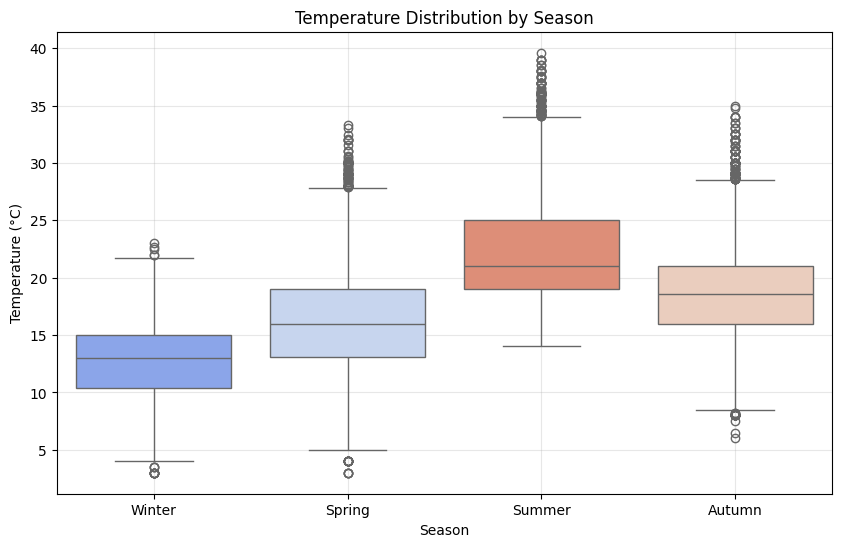

In [7]:
plot_temperature_by_season(df)

C:\Users\prafa\AppData\Local\Temp\ipykernel_12816\3078553568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['datetime'].map(get_season)
C:\Users\prafa\AppData\Local\Temp\ipykernel_12816\3078553568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='temp', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)


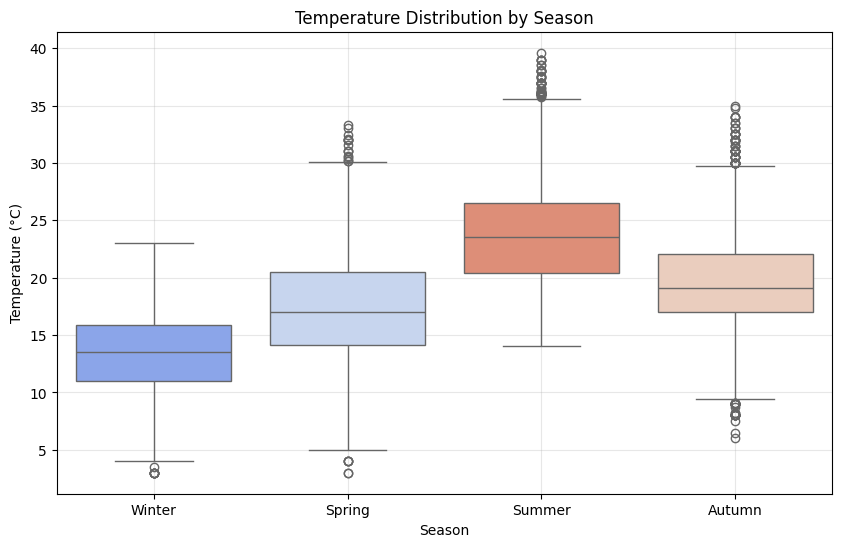

In [8]:
# extrair a noite para ver se há uma diferença, sendo que as temperaturas a noite no verão são frias. 
df['hour'] = df['datetime'].dt.hour  # Extrai a hora da coluna datetime
df_filtered = df[(df['hour'] >= 6) & (df['hour'] <= 20)]  # Filtra entre 6h da manhã e 20h

plot_temperature_by_season(df_filtered)


In [11]:
# Função para o boxplot de precipitação por estação
def plot_precipitation_by_season(df):
    df['season'] = df['datetime'].map(get_season)

    # Criar um boxplot para precipitação por estação
    palette = sns.color_palette('coolwarm', 4)  # Gera 4 cores da paleta coolwarm
    palette[2], palette[3] = palette[3], palette[2]  # Troca as cores do verão e do outono

    # Criar o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='season', y='precip', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)
    plt.title('Precipitation Distribution by Season')
    plt.xlabel('Season')
    plt.ylabel('Precipitation (mm)')
    plt.grid(alpha=0.3)
    plt.show()



C:\Users\prafa\AppData\Local\Temp\ipykernel_12816\3959950934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='precip', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)


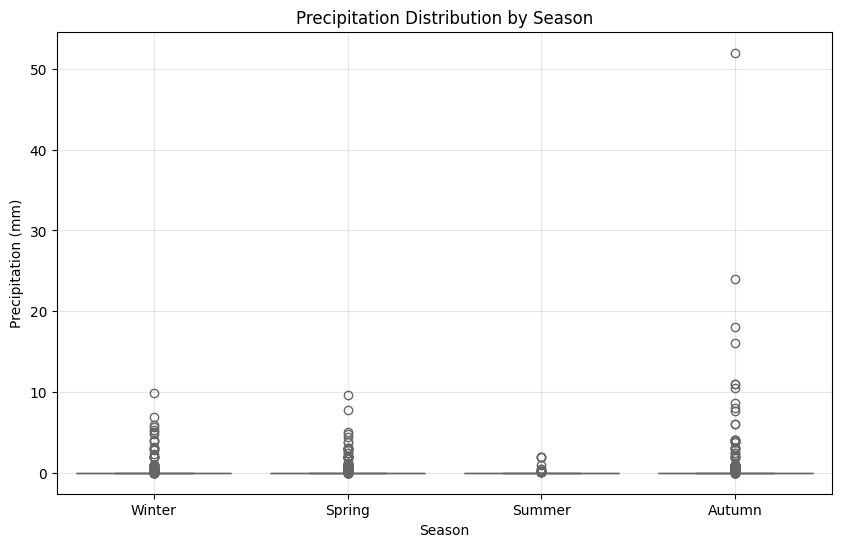

In [12]:
plot_precipitation_by_season(df)

C:\Users\prafa\AppData\Local\Temp\ipykernel_12816\3959950934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['datetime'].map(get_season)
C:\Users\prafa\AppData\Local\Temp\ipykernel_12816\3959950934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='precip', data=df, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette=palette)


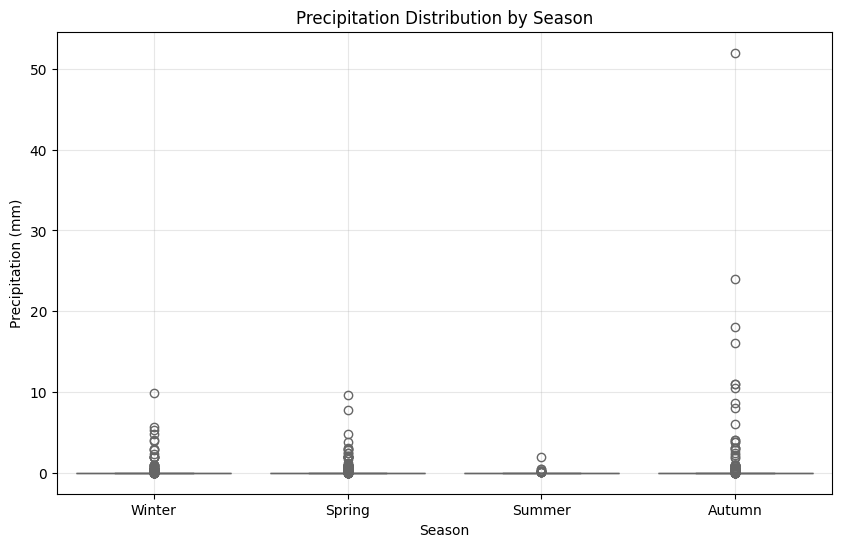

In [13]:
# Filtrar os dados para incluir apenas o período entre 6h e 21h
df['hour'] = df['datetime'].dt.hour  # Extrai a hora da coluna datetime
df_filtered = df[(df['hour'] >= 6) & (df['hour'] <= 21)]  # Filtra entre 6h e 21h
plot_precipitation_by_season(df_filtered)

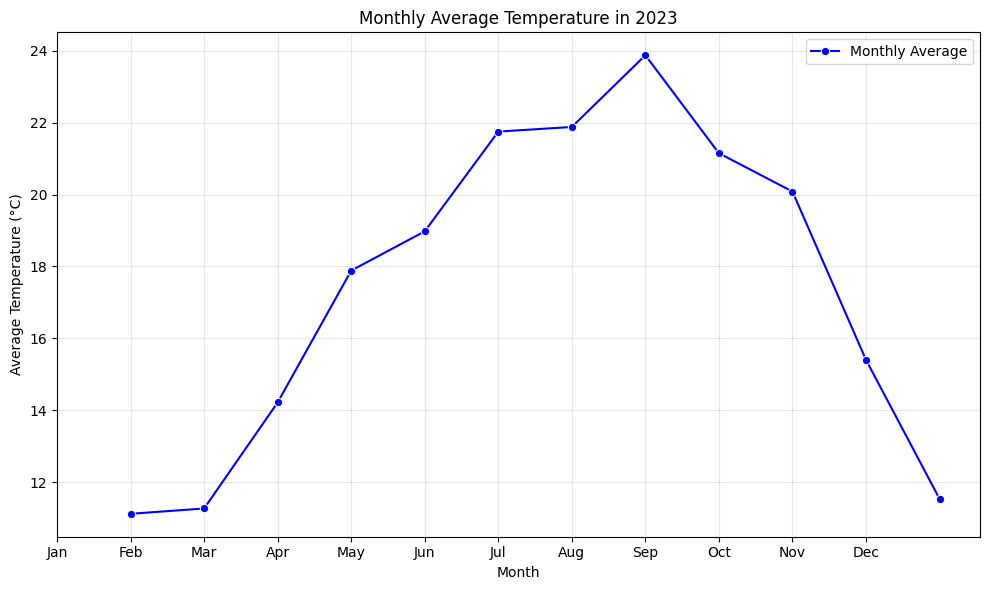

In [14]:
# Extrair o ano e o mês da coluna datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Filtrar os dados para um ano específico (exemplo: 2023)
year_to_filter = 2023  # Defina o ano desejado aqui
df_filtered = df[df['year'] == year_to_filter]

# Calcular a temperatura média por mês
monthly_avg_temp = df_filtered.groupby(['month'])['temp'].mean().reset_index()

# Plotar o gráfico de linha para a média mensal de temperatura
plt.figure(figsize=(10, 6))

# Gráfico de linha para a temperatura média mensal
sns.lineplot(x='month', y='temp', data=monthly_avg_temp, marker='o', color='b', label='Monthly Average')

# Definir o título dinamicamente com o ano do filtro
plt.title(f'Monthly Average Temperature in {year_to_filter}')

# Definir os nomes dos meses em inglês no eixo X
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()